In [3]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
# Feature importance
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier

In [4]:
## Load the dataset
data = pd.read_csv("../data/tree_addhealth.csv")
data = data.dropna()
data.dtypes

BIO_SEX      float64
HISPANIC     float64
WHITE        float64
BLACK        float64
NAMERICAN    float64
ASIAN        float64
age          float64
TREG1        float64
ALCEVR1      float64
ALCPROBS1      int64
marever1       int64
cocever1       int64
inhever1       int64
cigavail     float64
DEP1         float64
ESTEEM1      float64
VIOL1        float64
PASSIST        int64
DEVIANT1     float64
SCHCONN1     float64
GPA1         float64
EXPEL1       float64
FAMCONCT     float64
PARACTV      float64
PARPRES      float64
dtype: object

In [5]:
data.describe()

,BIO_SEX,HISPANIC,WHITE,BLACK,NAMERICAN,ASIAN,age,TREG1,ALCEVR1,ALCPROBS1,...,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
count,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,...,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000
mean,1.521093,0.111038,0.683279,0.236066,0.036284,0.040437,16.493052,0.176393,0.527432,0.369180,...,40.952131,1.618579,0.102514,2.645027,28.360656,2.815647,0.040219,22.570557,6.290710,13.398033
std,0.499609,0.314214,0.465249,0.424709,0.187017,0.197004,1.552174,0.381196,0.499302,0.894947,...,5.381439,2.593230,0.303356,3.520554,5.156385,0.770167,0.196493,2.614754,3.360219,2.085837
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.676712,0.000000,0.000000,0.000000,...,18.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,6.300000,0.000000,3.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.254795,0.000000,0.000000,0.000000,...,38.000000,0.000000,0.000000,0.000000,25.000000,2.250000,0.000000,21.700000,4.000000,12.000000
50%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,16.509589,0.000000,1.000000,0.000000,...,40.000000,0.000000,0.000000,1.000000,29.000000,2.750000,0.000000,23.700000,6.000000,14.000000
75%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.679452,0.000000,1.000000,0.000000,...,45.000000,2.000000,0.000000,4.000000,32.000000,3.500000,0.000000,24.300000,9.000000,15.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.512329,1.000000,1.000000,6.000000,...,50.000000,19.000000,1.000000,27.000000,38.000000,4.000000,1.000000,25.000000,18.000000,15.000000


In [7]:
#Split into training and testing sets

predictors = data[['BIO_SEX','HISPANIC','WHITE','BLACK','NAMERICAN','ASIAN','age',
'ALCEVR1','ALCPROBS1','marever1','cocever1','inhever1','cigavail','DEP1','ESTEEM1','VIOL1',
'PASSIST','DEVIANT1','SCHCONN1','GPA1','EXPEL1','FAMCONCT','PARACTV','PARPRES']]

targets = data.TREG1

pred_train, pred_test, tar_train, tar_test  = train_test_split(predictors, targets, test_size=.4)

print pred_train.shape
print pred_test.shape
print tar_train.shape
print tar_test.shape

(2745, 24)
(1830, 24)
(2745L,)
(1830L,)


In [8]:
## Build model on training data
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=25)
classifier=classifier.fit(pred_train, tar_train)
predictions=classifier.predict(pred_test)
sklearn.metrics.confusion_matrix(tar_test, predictions)

array([[1455,   62],
       [ 211,  102]])

In [9]:
sklearn.metrics.accuracy_score(tar_test, predictions)

0.85081967213114751

In [10]:
## Fit an extra trees model to the data
model = ExtraTreesClassifier()
model.fit(pred_train, tar_train)

## display the relative importance of each attribute
print(model.feature_importances_)

[ 0.02600986  0.01692354  0.02441429  0.01956754  0.00838667  0.00573475
  0.06217364  0.07416682  0.03890392  0.10020161  0.02192496  0.01407351
  0.02862242  0.0582952   0.05635644  0.05888633  0.01883861  0.05912847
  0.0540891   0.07096362  0.01442957  0.06084011  0.06150062  0.04556839]


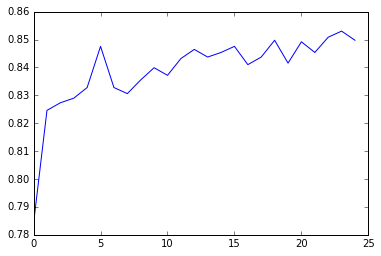

In [14]:
"""
Running a different number of trees to see the effect of that
on the accuracy of prediction
"""
trees=range(25)
accuracy=np.zeros(25)

for idx in range(len(trees)):
    classifier=RandomForestClassifier(n_estimators=idx+1)
    classifier=classifier.fit(pred_train, tar_train)
    predictions=classifier.predict(pred_test)
    accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, predictions)

%matplotlib inline
plt.cla()

plt.plot(trees, accuracy)